There were 69 total error messages in 1 wafer.
Number of scan chain errors: 12
Number of analog scan failures: 1
Number of digital scan failures: 0
Number of VDD errors: 0
Number of chips with dead pixels: 5
Number of DAQ function program terminations:0
Number of programming errors: 0
Number of DAQ digital scan errors: 0
Number of DAC calibration errors: 0
------
1 chip(s) did not complete testing
Other errors (2): ['DAQ function analog_scan terminated unexpectedly!', 'Analog scan failed due to DAQ error!']


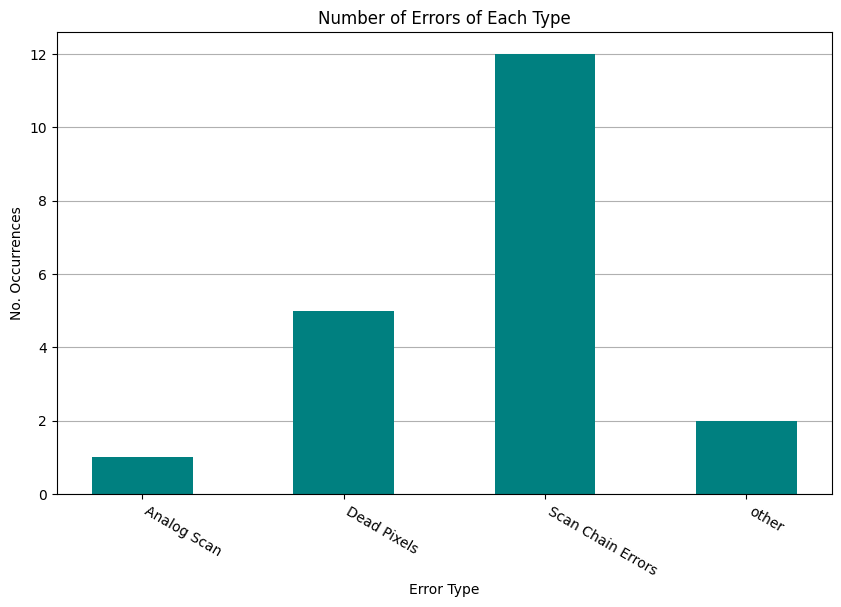

In [4]:
#Analyze errors of one file (UPDATED) (2)
import re
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

#open file
with open('/nfshome/natpenn/Desktop/CROCv2-iter2/wafer_N61F26-15F3_20240412_163717.log', 'r') as file:
    log_content = file.readlines()

pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| ChipTester \(\S\S\S\S\-(\w\w\)) \| ERROR    \| (.*)'

#find errors
chip = ()
errors1 = ()
errors = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        chip = str(match.group(2)) 
        chip = chip.replace(")","")
        errors1 = match.group(3) 
        errors.append(chip+errors1)

#Remove duplicate errors (for each chip)
errors = list(set(errors))
errors = [i[2:] for i in errors]

#error counter
scan_chain = 0
analog_scan = 0
digital_scan = 0
vdd = 0
register_error = 0
daq_func_prog_term = 0
dead_pixels = 0
testing_aborted = 0
test_end = 0
prog_err = 0
daq_digital = 0
daq_digital_2 = 0 #error message with the previous
dac_calibration = 0
dac_calibration_2 = 0 #error message with the previous
other_errors = []
pattern2 = r'Register .* failed the test'
pattern3 = r'Number of errors: .*'
pattern4 = r'Testing has been aborted for chip (.*)'
xxx = 0

#count each error type
for x in errors:
    match2 = re.search(pattern2, x)
    match3 = re.search(pattern3, x)
    match4 = re.search(pattern4, x)
    if x==("Scan chain test failed!"):
        scan_chain = scan_chain + 1
    elif x==("Analog scan failed!"):
        analog_scan = analog_scan + 1
    elif x==("Digital scan failed!"):
        digital_scan = digital_scan + 1
    elif x==("DAQ function write_vdd_trim_bits terminated unexpectedly!"):
        vdd = vdd + 1
    elif x==("Register W&R errors detected!"):
        register_error = register_error + 1
    elif x==("DAQ function program terminated unexpectedly!"):
        daq_func_prog_term = daq_func_prog_term + 1
    elif x==("Waferprobing has been aborted!"):
        test_end = test_end + 1
    elif x==("Could not program the chip!"):
        prog_err = prog_err + 1
    elif x==("DAQ function digital_scan terminated unexpectedly!"):
        daq_digital = daq_digital + 1
    elif x==("Digital scan failed due to DAQ error!"):
        daq_digital_2 = daq_digital_2 + 1
    elif x==("DAQ function dac_calibration terminated unexpectedly!"):
        dac_calibration = dac_calibration + 1
    elif x==("DACs calibration failed! Continuing the testing..."):
        dac_calibration_2 = dac_calibration_2 + 1
    elif match2:
        dead_pixels = dead_pixels + 1
    elif match3:
        xxx = xxx + 1
    elif match4:
        testing_aborted = testing_aborted +1
    else:
        other_errors.append(x)
    
#printing
print("There were " + str(len(errors)) + " total error messages in 1 wafer.")
print("Number of scan chain errors: " + str(scan_chain))
print("Number of analog scan failures: " + str(analog_scan))
print("Number of digital scan failures: " + str(digital_scan))
print("Number of VDD errors: " + str(vdd))
print("Number of chips with dead pixels: " + str(register_error))
print("Number of DAQ function program terminations:" + str(daq_func_prog_term))
print("Number of programming errors: " + str(prog_err))
print("Number of DAQ digital scan errors: " + str(daq_digital))
print("Number of DAC calibration errors: " + str(dac_calibration))
print("------")
print(str(testing_aborted) + " chip(s) did not complete testing")
#print("Total number of dead pixels: " + str(dead_pixels) + " (of " + str(145152*test_end) + " in " + str(test_end) + " wafer)")
print("Other errors (" + str(len(other_errors)) + "): " + str(other_errors))

#use if there are errors with test ending to match with number of total tests
'''if test_end == 1:
    print("Test ended")
elif test_end == 0:
    print("Test end error")
else:
    print(str(test_end) + " Tests ended")'''


# Plot
data = {'Scan Chain Errors':scan_chain,'VDD':vdd,'Dead Pixels':register_error,'Digital Scan':digital_scan,'DAQ Func Prog Term':daq_func_prog_term,'DAQ Digital Scan':daq_digital,'Analog Scan':analog_scan,'DAC Calibration':dac_calibration,'other':len(other_errors)}

alph_data = dict(sorted(data.items()))
clean_data = {k:v for k,v in alph_data.items() if v > 0}
labels = list(clean_data.keys())
values = list(clean_data.values())

fig = plt.figure(figsize = (10, 6))

# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()

In [ ]:
#UNFINISHED multiple files and separate stats for each one
import re
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

#open file
path = "/nfshome/natpenn/Desktop/test"
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .*ERROR    \| (.*)' 
errors = []

#error counter
errors = []
scan_chain = 0
analog_scan = 0
digital_scan = 0
vdd = 0
register_error = 0
daq_func_prog_term = 0
dead_pixels = 0
testing_aborted = 0
test_end = 0
prog_err = 0
daq_digital = 0
daq_digital_2 = 0 #error message with the previous
dac_calibration = 0
dac_calibration_2 = 0 #error message with the previous
other_errors = []
pattern2 = r'Register .* failed the test'
pattern3 = r'Number of errors: .*'
pattern4 = r'Testing has been aborted for chip (.*)'
xxx = 0


for file_name in os.listdir(path):
    if file_name.endswith(".log"):  #Check if the file is a .log file and specify chip
        file_path = os.path.join(path, file_name)
        with open(file_path, 'r') as file:
            log_content = file.readlines()

        #find errors
        for line in log_content:
            match = re.search(pattern, line)
            if match:
                error = match.group(2)  
                errors.append(error)

        #fix the weird thingy
        #weirdpattern = re.compile(r'.*x1b\[0m')
        #result = [weirdpattern.sub('', string) for string in errors]
        '''substring = '\x1b[0m'
        errors2 = []
        for string in errors:
            errors2.append(string.replace(substring, ''))'''
        #print("Errors: " + str(errors))
        #print("result: " + str(result))
                
        for x in errors2:
            match2 = re.search(pattern2, x)
            match3 = re.search(pattern3, x)
            match4 = re.search(pattern4, x)
            if x==("Scan chain test failed!"):
                scan_chain = scan_chain + 1
            elif x==("Analog scan failed!"):
                analog_scan = analog_scan + 1
            elif x==("DAQ function write_vdd_trim_bits terminated unexpectedly!"):
                vdd = vdd + 1
            elif x==("Register W&R errors detected!"):
                register_error = register_error + 1
            elif x==("Waferprobing has been aborted!"):
                test_end = test_end + 1
            elif match2:
                dead_pixels = dead_pixels + 1
            elif match3:
                pass
                #what does "Number of errors" mean in the error log??
            elif match4:
                testing_aborted = testing_aborted +1
            else:
                other_errors.append(x)
            
        #printing
        #print(errors) 
        print(numberoflogs)
        print("total errors: " + str(len(errors)) + " total errors2: " + str(len(errors2)))
        print("Number of scan chain errors: " + str(scan_chain))
        print("Number of analog scan failures: " + str(analog_scan))
        print("Number of VDD errors: " + str(vdd))
        print("Number of dead pixel errors: " + str(register_error))
        print(str(testing_aborted) + " chip(s) did not finish testing")
        print("Other errors: " + str(len(other_errors)) + str(other_errors))
        print("Total number of dead pixels: " + str(dead_pixels) + " (of ___ in wafer)")
        if test_end == 1:
            print("Test ended")
        elif test_end == 0:
            print("Test end error")
        else:
            print("Multiple Tests ended")

There were 156 total error messages in 3 wafers.
Number of scan chain errors: 26
Number of analog scan failures: 2
Number of digital scan failures: 6
Number of VDD errors: 7
Number of chips with dead pixels: 7
Number of DAQ function program terminations:5
Number of programming errors: 5
Number of DAQ digital scan errors: 3
Number of DAC calibration errors: 2
------
10 chip(s) did not complete testing
Total number of dead pixels: 48 (of 435456 in 3 wafers)
Other errors (14): ['DAQ function ringosc_calibration terminated unexpectedly!', 'Ring oscillators calibration failed! Continuing the testing...', 'DAQ function set_low_chip_power terminated unexpectedly!', 'Failed to set low chip power!', 'Temperature calibration failed!', 'DAQ function set_standard_chip_power terminated unexpectedly!', 'Failed to set default chip power!', 'Failed to perform the pixel power measurement. Going on with the testing...', 'Measured values in SLDO mode not within tolerance!', 'Bandgap voltage measurement f

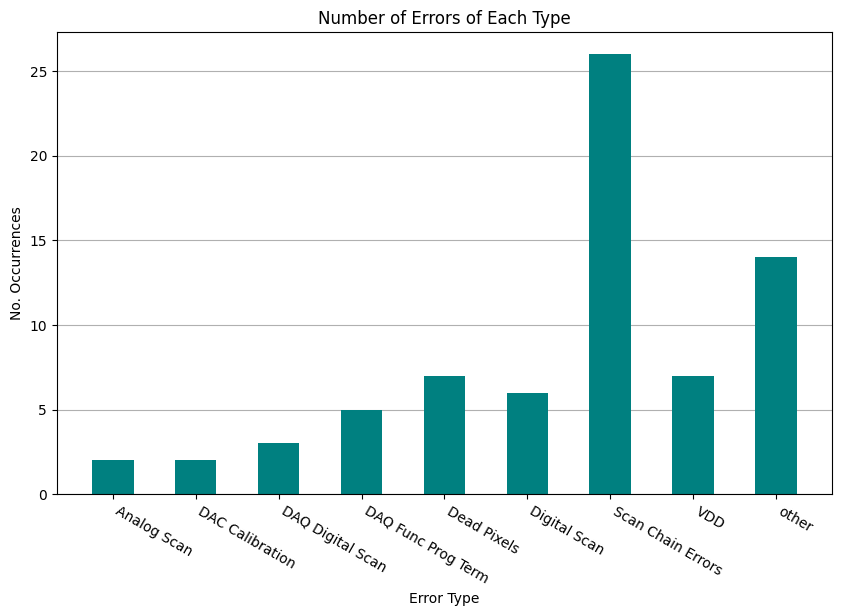

In [2]:
#Analyze errors of all files in a folder
#Does NOT delete duplicates on chips or differentiate between wafers

import re
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

#error counter
errors = []
scan_chain = 0
analog_scan = 0
digital_scan = 0
vdd = 0
register_error = 0
daq_func_prog_term = 0
dead_pixels = 0
testing_aborted = 0
test_end = 0
prog_err = 0
daq_digital = 0
daq_digital_2 = 0 #error message with the previous
dac_calibration = 0
dac_calibration_2 = 0 #error message with the previous
other_errors = []
pattern2 = r'Register .* failed the test'
pattern3 = r'Number of errors: .*'
pattern4 = r'Testing has been aborted for chip (.*)'
xxx = 0

#open file
path = "/nfshome/natpenn/Desktop/test"
pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}) \| .*ERROR    \| (.*)' 
for file_name in os.listdir(path):
    if file_name.endswith(".log"):  #Check if the file is a .log file and specify chip
        file_path = os.path.join(path, file_name)
        with open(file_path, 'r') as file:
            log_content = file.readlines()

        #find errors
        for line in log_content:
            match = re.search(pattern, line)
            if match:
                error = match.group(2)  
                errors.append(error)

#count each error type        
for x in errors:
    match2 = re.search(pattern2, x)
    match3 = re.search(pattern3, x)
    match4 = re.search(pattern4, x)
    if x==("Scan chain test failed!"):
        scan_chain = scan_chain + 1
    elif x==("Analog scan failed!"):
        analog_scan = analog_scan + 1
    elif x==("Digital scan failed!"):
        digital_scan = digital_scan + 1
    elif x==("DAQ function write_vdd_trim_bits terminated unexpectedly!"):
        vdd = vdd + 1
    elif x==("Register W&R errors detected!"):
        register_error = register_error + 1
    elif x==("DAQ function program terminated unexpectedly!"):
        daq_func_prog_term = daq_func_prog_term + 1
    elif x==("Waferprobing has been aborted!"):
        test_end = test_end + 1
    elif x==("Could not program the chip!"):
        prog_err = prog_err + 1
    elif x==("DAQ function digital_scan terminated unexpectedly!"):
        daq_digital = daq_digital + 1
    elif x==("Digital scan failed due to DAQ error!"):
        daq_digital_2 = daq_digital_2 + 1
    elif x==("DAQ function dac_calibration terminated unexpectedly!"):
        dac_calibration = dac_calibration + 1
    elif x==("DACs calibration failed! Continuing the testing..."):
        dac_calibration_2 = dac_calibration_2 + 1
    elif match2:
        dead_pixels = dead_pixels + 1
    elif match3:
        xxx = xxx + 1
        #what does "Number of errors" mean in the error log??
    elif match4:
        testing_aborted = testing_aborted +1
    else:
        other_errors.append(x)
    
#printing
#print(errors) 
print("There were " + str(len(errors)) + " total error messages in " + str(test_end) + " wafers.")
print("Number of scan chain errors: " + str(scan_chain))
print("Number of analog scan failures: " + str(analog_scan))
print("Number of digital scan failures: " + str(digital_scan))
print("Number of VDD errors: " + str(vdd))
print("Number of chips with dead pixels: " + str(register_error))
print("Number of DAQ function program terminations:" + str(daq_func_prog_term))
print("Number of programming errors: " + str(prog_err))
print("Number of DAQ digital scan errors: " + str(daq_digital))
print("Number of DAC calibration errors: " + str(dac_calibration))
print("------")
#print("xxx: " + str(xxx))
print(str(testing_aborted) + " chip(s) did not complete testing")
print("Total number of dead pixels: " + str(dead_pixels) + " (of " + str(145152*test_end) + " in " + str(test_end) + " wafers)")
print("Other errors (" + str(len(other_errors)) + "): " + str(other_errors))

#use if there are errors with test ending to match with number of total tests
'''if test_end == 1:
    print("Test ended")
elif test_end == 0:
    print("Test end error")
else:
    print(str(test_end) + " Tests ended")'''


# Plot
data = {'Scan Chain Errors':scan_chain,'VDD':vdd,'Dead Pixels':register_error,'Digital Scan':digital_scan,'DAQ Func Prog Term':daq_func_prog_term,'DAQ Digital Scan':daq_digital,'Analog Scan':analog_scan,'DAC Calibration':dac_calibration,'other':len(other_errors)}
alph_data = dict(sorted(data.items()))
clean_data = {k:v for k,v in alph_data.items() if v > 0}
labels = list(clean_data.keys())
values = list(clean_data.values())
  
fig = plt.figure(figsize = (10, 6))
 
# creating the bar plot
plt.bar(labels, values, color ='teal', 
        width = 0.5, zorder=2)

plt.grid(axis = 'y', zorder = 1)
plt.xlabel("Error Type")
plt.ylabel("No. Occurrences")
plt.title("Number of Errors of Each Type")
plt.xticks(rotation=-30, ha='left')
plt.show()


